In [1]:
import pandas as pd
import torch
from NLPUtils import *
import re
import fasttext

%matplotlib notebook
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
with open('corpus.txt', 'r') as corpus_file:
    lines = corpus_file.readlines()
    corpus = [line[:-1].split(' ') for line in lines]
    corpus = [[token for doc in corpus for token in doc]]

In [3]:
window_size = 8     # Tamaño de la ventana del contexto.
cutoff_freq = 0     # Palabras con una frecuencia menor o igual a cutoff_freq son excluídas del vocabulario.
batch_size = 512    # Tamaño del batch.

trainer = Word2vecTrainer(corpus,cutoff_freq=cutoff_freq,window_size=window_size,batch_size=batch_size)

Word2vec trainer created:
Window size: 8
Number of samples: 38960
Vocabulary Size: 5922
Number of batches: 77
Number of samples per batch: 512



In [9]:
model = 'SkipGram'    # Método de entrenamiento.
embedding_dim = 200   # Dimensión del espacio de los word vectors.
device = 'cuda:1'     # Dispositivo sobre el cual se entrena. 
state_dict = None     # Parámetros pre-entrenados.
paralelize = False     # Flag para decirle al programa que use las 2 gpus

trainer.InitModel(model=model, state_dict=state_dict, device=device, paralelize=paralelize, embedding_dim=embedding_dim)

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 200


In [15]:
epochs = 100
learning_rate = 1e-4
sample_loss_every = 10
algorithm = 'Adam'

trainer.Train(algorithm=algorithm, epochs=epochs, sample_loss_every=sample_loss_every, lr=learning_rate)

Resuming training...
Optimization method: Adam
Learning Rate: 0.0001
Number of epochs: 100
Running on device (cuda:1)

Epoch: 1, Batch number: 0, Loss: 48276.08203125
Epoch: 1, Batch number: 10, Loss: 48524.7109375
Epoch: 1, Batch number: 20, Loss: 48559.8203125
Epoch: 1, Batch number: 30, Loss: 48287.84375
Epoch: 1, Batch number: 40, Loss: 48587.75390625
Epoch: 1, Batch number: 50, Loss: 48035.25
Epoch: 1, Batch number: 60, Loss: 48072.90625
Epoch: 1, Batch number: 70, Loss: 48641.83984375
Epoch: 2, Batch number: 3, Loss: 48323.32421875
Epoch: 2, Batch number: 13, Loss: 47953.69140625
Epoch: 2, Batch number: 23, Loss: 48464.05859375
Epoch: 2, Batch number: 33, Loss: 48743.8671875
Epoch: 2, Batch number: 43, Loss: 48776.40625
Epoch: 2, Batch number: 53, Loss: 48746.10546875
Epoch: 2, Batch number: 63, Loss: 48709.9453125
Epoch: 2, Batch number: 73, Loss: 48350.66796875
Epoch: 3, Batch number: 6, Loss: 47960.16796875
Epoch: 3, Batch number: 16, Loss: 48324.2265625
Epoch: 3, Batch number

Epoch: 22, Batch number: 53, Loss: 47637.77734375
Epoch: 22, Batch number: 63, Loss: 47544.8828125
Epoch: 22, Batch number: 73, Loss: 48127.99609375
Epoch: 23, Batch number: 6, Loss: 47806.00390625
Epoch: 23, Batch number: 16, Loss: 48080.01171875
Epoch: 23, Batch number: 26, Loss: 47369.15234375
Epoch: 23, Batch number: 36, Loss: 48272.09765625
Epoch: 23, Batch number: 46, Loss: 47657.6640625
Epoch: 23, Batch number: 56, Loss: 48160.34375
Epoch: 23, Batch number: 66, Loss: 47401.60546875
Epoch: 23, Batch number: 76, Loss: 4332.994140625
Epoch: 24, Batch number: 9, Loss: 47783.18359375
Epoch: 24, Batch number: 19, Loss: 48171.546875
Epoch: 24, Batch number: 29, Loss: 48433.3359375
Epoch: 24, Batch number: 39, Loss: 47361.18359375
Epoch: 24, Batch number: 49, Loss: 48198.109375
Epoch: 24, Batch number: 59, Loss: 47487.5546875
Epoch: 24, Batch number: 69, Loss: 47685.671875
Epoch: 25, Batch number: 2, Loss: 47676.48828125
Epoch: 25, Batch number: 12, Loss: 47781.80859375
Epoch: 25, Batch

Epoch: 44, Batch number: 39, Loss: 46946.03125
Epoch: 44, Batch number: 49, Loss: 47017.55078125
Epoch: 44, Batch number: 59, Loss: 47177.51953125
Epoch: 44, Batch number: 69, Loss: 47616.87890625
Epoch: 45, Batch number: 2, Loss: 46859.265625
Epoch: 45, Batch number: 12, Loss: 47500.41796875
Epoch: 45, Batch number: 22, Loss: 47593.37890625
Epoch: 45, Batch number: 32, Loss: 47057.93359375
Epoch: 45, Batch number: 42, Loss: 47338.33203125
Epoch: 45, Batch number: 52, Loss: 46859.40625
Epoch: 45, Batch number: 62, Loss: 47150.01953125
Epoch: 45, Batch number: 72, Loss: 47447.88671875
Epoch: 46, Batch number: 5, Loss: 47366.81640625
Epoch: 46, Batch number: 15, Loss: 47434.0078125
Epoch: 46, Batch number: 25, Loss: 47377.3828125
Epoch: 46, Batch number: 35, Loss: 47804.05859375
Epoch: 46, Batch number: 45, Loss: 47528.67578125
Epoch: 46, Batch number: 55, Loss: 47546.359375
Epoch: 46, Batch number: 65, Loss: 47705.41015625
Epoch: 46, Batch number: 75, Loss: 47789.5390625
Epoch: 47, Batc

Epoch: 66, Batch number: 35, Loss: 46778.67578125
Epoch: 66, Batch number: 45, Loss: 47262.86328125
Epoch: 66, Batch number: 55, Loss: 46615.4453125
Epoch: 66, Batch number: 65, Loss: 46985.140625
Epoch: 66, Batch number: 75, Loss: 46339.97265625
Epoch: 67, Batch number: 8, Loss: 46599.4609375
Epoch: 67, Batch number: 18, Loss: 46944.41015625
Epoch: 67, Batch number: 28, Loss: 46870.6640625
Epoch: 67, Batch number: 38, Loss: 46708.4296875
Epoch: 67, Batch number: 48, Loss: 46309.6328125
Epoch: 67, Batch number: 58, Loss: 47023.65234375
Epoch: 67, Batch number: 68, Loss: 46792.26171875
Epoch: 68, Batch number: 1, Loss: 46365.16796875
Epoch: 68, Batch number: 11, Loss: 46536.859375
Epoch: 68, Batch number: 21, Loss: 46564.26953125
Epoch: 68, Batch number: 31, Loss: 47193.1640625
Epoch: 68, Batch number: 41, Loss: 46380.421875
Epoch: 68, Batch number: 51, Loss: 46831.62109375
Epoch: 68, Batch number: 61, Loss: 47038.88671875
Epoch: 68, Batch number: 71, Loss: 46846.50390625
Epoch: 69, Bat

Epoch: 88, Batch number: 21, Loss: 46546.984375
Epoch: 88, Batch number: 31, Loss: 46887.56640625
Epoch: 88, Batch number: 41, Loss: 46975.5703125
Epoch: 88, Batch number: 51, Loss: 46888.34765625
Epoch: 88, Batch number: 61, Loss: 46458.71484375
Epoch: 88, Batch number: 71, Loss: 46628.1171875
Epoch: 89, Batch number: 4, Loss: 46028.87109375
Epoch: 89, Batch number: 14, Loss: 46413.99609375
Epoch: 89, Batch number: 24, Loss: 46486.3359375
Epoch: 89, Batch number: 34, Loss: 46506.80859375
Epoch: 89, Batch number: 44, Loss: 46144.6875
Epoch: 89, Batch number: 54, Loss: 46759.125
Epoch: 89, Batch number: 64, Loss: 46224.69140625
Epoch: 89, Batch number: 74, Loss: 46791.69140625
Epoch: 90, Batch number: 7, Loss: 46741.09375
Epoch: 90, Batch number: 17, Loss: 46153.45703125
Epoch: 90, Batch number: 27, Loss: 46251.1015625
Epoch: 90, Batch number: 37, Loss: 46407.9375
Epoch: 90, Batch number: 47, Loss: 46861.8671875
Epoch: 90, Batch number: 57, Loss: 46323.32421875
Epoch: 90, Batch number: 

<IPython.core.display.Javascript object>


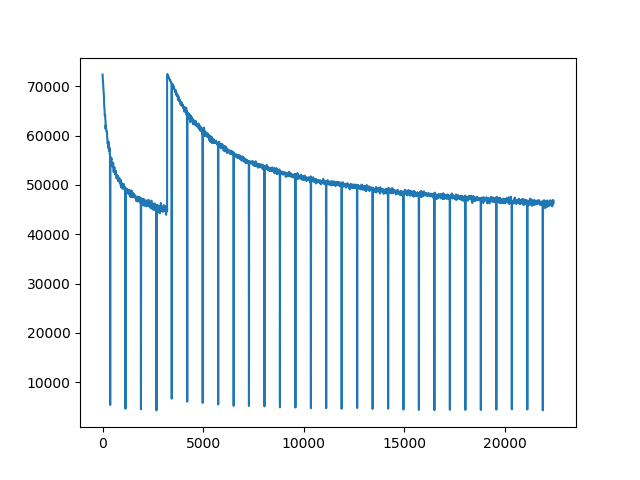

In [16]:
fig, ax = plt.subplots()
ax.plot(trainer.loss_history['iter'],trainer.loss_history['loss'])

In [38]:
idx = np.argsort(list(trainer.dataloader.dataset.vocabulary._idx_to_freq.values()))
most_frequents = [trainer.dataloader.dataset.vocabulary._idx_to_tk[idx[-i]] for i in range(40,60)]

word_list = most_frequents
trainer.GetCloseVectors(word_list, firsts=20)

Word			Closest Words			Cosine Distance
-----------------------------------------------------------------------
sin			soares				0.291783
			precipitar			0.274810
			paciencia			0.254752
			menos				0.232483
			investigaba			0.229494
			crítico				0.226596
			empresarios			0.222823
			comercio			0.221828
			cumplir				0.221536
			mástil				0.217904
			serbia				0.212922
			jueguito			0.209103
			cumplen				0.208547
			publicó				0.207923
			dóllar				0.207825
			yeltsin				0.206341
			dudas				0.206259
			deserción			0.205200
			temores				0.203457
			cooperación			0.203154

sobre			participé			0.240422
			modificada			0.238884
			informó				0.234335
			me				0.231986
			examinadas			0.230281
			democráticos			0.230133
			correspondientes			0.229066
			misma				0.225246
			fracasaron			0.224422
			esperaba			0.221105
			italiano			0.220887
			tratará				0.218283
			subido				0.218207
			ahorro				0.218024
			distintos			0.216924
			aspirantes			0.215762
			romper				0.211612
			combinaci